
# 📘 M3.1 Pandas 進階資料選取與篩選

本教學將介紹 Pandas 中的進階資料選取與篩選技巧，這些技巧能讓您更有效地處理複雜資料集。
進階篩選能力在處理大型資料集、複雜分析和資料清洗任務時特別重要，能顯著提升您的數據分析效率。


## 🎯 教學目標

- 🔍 掌握複雜條件組合與布林索引進階技巧
- 🔄 學習多級索引與標籤操作的進階方法
- 📊 深入了解 query() 方法與字符串表達式篩選
- 🧮 探索 DataFrame 選取的高效方法
- 🛠️ 掌握專業資料分析師常用的進階篩選技巧


## 🧰 1. 環境設置

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 設置顯示選項
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 80)
pd.set_option('display.precision', 2)


## 📊 2. 複雜條件組合與進階布爾索引

In [2]:
# 建立較複雜的示例資料
np.random.seed(42)  # 設定隨機種子以確保結果可重現
df = pd.DataFrame({
    'ID': range(1000, 1020),
    'Name': ['Client_' + str(i) for i in range(20)],
    'Age': np.random.randint(18, 70, 20),
    'Income': np.random.randint(30000, 100000, 20),
    'Score': np.random.randint(0, 100, 20) / 10,
    'Category': np.random.choice(['A', 'B', 'C', 'D'], 20),
    'Status': np.random.choice(['Active', 'Inactive', 'Pending'], 20),
    'RegisterDate': pd.date_range(start='2020-01-01', periods=20),
    'LastLogin': pd.date_range(start='2023-01-01', periods=20),
})

print("資料預覽:")
print(df.head())

資料預覽:
     ID      Name  Age  Income  Score Category    Status RegisterDate  \
0  1000  Client_0   56   92955    2.0        B  Inactive   2020-01-01   
1  1001  Client_1   69   94925    7.2        A  Inactive   2020-01-02   
2  1002  Client_2   46   97969    3.8        D   Pending   2020-01-03   
3  1003  Client_3   32   35311    1.7        B   Pending   2020-01-04   
4  1004  Client_4   60   83707    0.3        D  Inactive   2020-01-05   

   LastLogin  
0 2023-01-01  
1 2023-01-02  
2 2023-01-03  
3 2023-01-04  
4 2023-01-05  



### 2.1 複雜條件的嵌套與組合

In [3]:
# 複雜條件混合 AND, OR, NOT 操作
complex_filter = (
    # 高收入且年齡較大的客戶 或 高分數且狀態活躍的客戶
    ((df['Income'] > 80000) & (df['Age'] > 50)) | 
    ((df['Score'] > 7) & (df['Status'] == 'Active'))
) & ~(df['Category'].isin(['D']))  # 排除 D 類別

print("複雜條件篩選結果:")
print(df[complex_filter])

複雜條件篩選結果:
      ID       Name  Age  Income  Score Category    Status RegisterDate  \
0   1000   Client_0   56   92955    2.0        B  Inactive   2020-01-01   
1   1001   Client_1   69   94925    7.2        A  Inactive   2020-01-02   
9   1009   Client_9   40   89150    8.9        B    Active   2020-01-10   
12  1012  Client_12   41   97435    8.3        B    Active   2020-01-13   
13  1013  Client_13   53   86886    9.1        A  Inactive   2020-01-14   
14  1014  Client_14   57   96803    5.9        C    Active   2020-01-15   

    LastLogin  
0  2023-01-01  
1  2023-01-02  
9  2023-01-10  
12 2023-01-13  
13 2023-01-14  
14 2023-01-15  


In [4]:
# 使用括號控制條件優先級
# 案例：找出活躍用戶中，年齡小於30或收入高於75000的A或B類別用戶
priority_filter = (
    (df['Status'] == 'Active') & 
    ((df['Age'] < 30) | (df['Income'] > 75000)) & 
    (df['Category'].isin(['A', 'B']))
)

print("使用條件優先級篩選結果:")
print(df[priority_filter])

使用條件優先級篩選結果:
      ID       Name  Age  Income  Score Category  Status RegisterDate  \
9   1009   Client_9   40   89150    8.9        B  Active   2020-01-10   
12  1012  Client_12   41   97435    8.3        B  Active   2020-01-13   
16  1016  Client_16   20   41394    4.3        B  Active   2020-01-17   

    LastLogin  
9  2023-01-10  
12 2023-01-13  
16 2023-01-17  



### 2.2 使用 query() 方法進行高效篩選

In [5]:
# 使用 query() 的基本語法
query_result = df.query('Age > 40 and Income > 60000')
print("使用 query() 篩選年齡 > 40 且收入 > 60000 的結果:")
print(query_result)

使用 query() 篩選年齡 > 40 且收入 > 60000 的結果:
      ID       Name  Age  Income  Score Category    Status RegisterDate  \
0   1000   Client_0   56   92955    2.0        B  Inactive   2020-01-01   
1   1001   Client_1   69   94925    7.2        A  Inactive   2020-01-02   
2   1002   Client_2   46   97969    3.8        D   Pending   2020-01-03   
4   1004   Client_4   60   83707    0.3        D  Inactive   2020-01-05   
12  1012  Client_12   41   97435    8.3        B    Active   2020-01-13   
13  1013  Client_13   53   86886    9.1        A  Inactive   2020-01-14   
14  1014  Client_14   57   96803    5.9        C    Active   2020-01-15   
15  1015  Client_15   41   61551    7.0        B    Active   2020-01-16   
19  1019  Client_19   41   71606    3.4        B    Active   2020-01-20   

    LastLogin  
0  2023-01-01  
1  2023-01-02  
2  2023-01-03  
4  2023-01-05  
12 2023-01-13  
13 2023-01-14  
14 2023-01-15  
15 2023-01-16  
19 2023-01-20  


In [6]:
# 在 query() 中使用變量參考
min_age = 30
max_income = 80000
categories = ['A', 'C']

# 使用 @ 符號引用外部變量
query_with_vars = df.query(
    'Age > @min_age and Income < @max_income and Category in @categories'
)

print("使用變量的 query() 篩選結果:")
print(query_with_vars)

使用變量的 query() 篩選結果:
Empty DataFrame
Columns: [ID, Name, Age, Income, Score, Category, Status, RegisterDate, LastLogin]
Index: []


In [7]:
# query() 方法的優勢：更簡潔的語法，尤其對複雜條件
complex_query = df.query(
    '(Income > 70000 and Age > 45) or '
    '(Score > 6 and Status == "Active") and '
    'Category != "D"'
)

print("複雜條件的 query() 篩選結果:")
print(complex_query)

複雜條件的 query() 篩選結果:
      ID       Name  Age  Income  Score Category    Status RegisterDate  \
0   1000   Client_0   56   92955    2.0        B  Inactive   2020-01-01   
1   1001   Client_1   69   94925    7.2        A  Inactive   2020-01-02   
2   1002   Client_2   46   97969    3.8        D   Pending   2020-01-03   
4   1004   Client_4   60   83707    0.3        D  Inactive   2020-01-05   
9   1009   Client_9   40   89150    8.9        B    Active   2020-01-10   
12  1012  Client_12   41   97435    8.3        B    Active   2020-01-13   
13  1013  Client_13   53   86886    9.1        A  Inactive   2020-01-14   
14  1014  Client_14   57   96803    5.9        C    Active   2020-01-15   
15  1015  Client_15   41   61551    7.0        B    Active   2020-01-16   

    LastLogin  
0  2023-01-01  
1  2023-01-02  
2  2023-01-03  
4  2023-01-05  
9  2023-01-10  
12 2023-01-13  
13 2023-01-14  
14 2023-01-15  
15 2023-01-16  



### 2.3 使用 eval() 進行向量化運算

In [8]:
# 使用 eval() 創建複合條件列
df['IncomePerAge'] = df.eval('Income / Age')
df['HighValue'] = df.eval('(Income > 70000) & (Score > 6)')

print("使用 eval() 創建新列後的數據:")
print(df[['Income', 'Age', 'Score', 'IncomePerAge', 'HighValue']].head(10))

使用 eval() 創建新列後的數據:
   Income  Age  Score  IncomePerAge  HighValue
0   92955   56    2.0       1659.91      False
1   94925   69    7.2       1375.72       True
2   97969   46    3.8       2129.76      False
3   35311   32    1.7       1103.47      False
4   83707   60    0.3       1395.12      False
5   58693   25    8.8       2347.72      False
6   55658   38    5.9       1464.68      False
7   48431   56    1.3        864.84      False
8   32747   36    0.8        909.64      False
9   89150   40    8.9       2228.75       True


In [9]:
# 使用 eval() 進行條件篩選
eval_filter = df.eval('(IncomePerAge > 1500) & (Status == "Active")')
print("使用 eval() 進行複合條件篩選結果:")
print(df[eval_filter])

使用 eval() 進行複合條件篩選結果:
      ID       Name  Age  Income  Score  ...  Status RegisterDate  LastLogin  \
9   1009   Client_9   40   89150    8.9  ...  Active   2020-01-10 2023-01-10   
12  1012  Client_12   41   97435    8.3  ...  Active   2020-01-13 2023-01-13   
14  1014  Client_14   57   96803    5.9  ...  Active   2020-01-15 2023-01-15   
15  1015  Client_15   41   61551    7.0  ...  Active   2020-01-16 2023-01-16   
16  1016  Client_16   20   41394    4.3  ...  Active   2020-01-17 2023-01-17   
17  1017  Client_17   39   99092    0.7  ...  Active   2020-01-18 2023-01-18   
19  1019  Client_19   41   71606    3.4  ...  Active   2020-01-20 2023-01-20   

   IncomePerAge  HighValue  
9       2228.75       True  
12      2376.46       True  
14      1698.30      False  
15      1501.24      False  
16      2069.70      False  
17      2540.82      False  
19      1746.49      False  

[7 rows x 11 columns]



## 📊 3. 多級索引與標籤操作

In [10]:
# 創建多級索引 DataFrame
multi_idx_data = pd.DataFrame({
    'Year': [2021, 2021, 2021, 2022, 2022, 2022, 2023, 2023],
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q1', 'Q2', 'Q3', 'Q1', 'Q2'],
    'Region': ['East', 'West', 'East', 'West', 'East', 'West', 'East', 'West'],
    'Sales': [100, 120, 110, 130, 140, 135, 150, 160],
    'Expenses': [80, 90, 85, 95, 100, 105, 110, 115]
})

# 設置多級索引
multi_df = multi_idx_data.set_index(['Year', 'Quarter', 'Region'])
print("多級索引 DataFrame:")
print(multi_df)

多級索引 DataFrame:
                     Sales  Expenses
Year Quarter Region                 
2021 Q1      East      100        80
     Q2      West      120        90
     Q3      East      110        85
2022 Q1      West      130        95
     Q2      East      140       100
     Q3      West      135       105
2023 Q1      East      150       110
     Q2      West      160       115



### 3.1 多級索引的選取操作

In [11]:
multi_df

Sales  Expenses
Year Quarter Region                 
2021 Q1      East      100        80
     Q2      West      120        90
     Q3      East      110        85
2022 Q1      West      130        95
     Q2      East      140       100
     Q3      West      135       105
2023 Q1      East      150       110
     Q2      West      160       115

In [12]:
# 選取特定層級的數據
print("選取2022年的所有數據:")
print(multi_df.loc[2022])

# 選取特定多級索引組合
print("\n選取2021年Q1東區的數據:")
print(multi_df.loc[(2021, 'Q1', 'East')])

# 選取跨層級的部分索引
print("\n選取2021-2022年Q1的數據:")
print(multi_df.loc[(slice(2021, 2022), 'Q1'), :])

選取2022年的所有數據:
                Sales  Expenses
Quarter Region                 
Q1      West      130        95
Q2      East      140       100
Q3      West      135       105

選取2021年Q1東區的數據:
Sales       100
Expenses     80
Name: (2021, Q1, East), dtype: int64

選取2021-2022年Q1的數據:
                     Sales  Expenses
Year Quarter Region                 
2021 Q1      East      100        80
2022 Q1      West      130        95


In [13]:
# 使用複雜的索引切片
print("使用複雜索引切片:")
idx = pd.IndexSlice
print(multi_df.loc[idx[2021:2022, ['Q1', 'Q3'], :], :])

使用複雜索引切片:
                     Sales  Expenses
Year Quarter Region                 
2021 Q1      East      100        80
     Q3      East      110        85
2022 Q1      West      130        95
     Q3      West      135       105


In [14]:
# 使用 xs 方法進行跨層級選取
print("使用 xs 選取所有年度的 Q2 數據:")
print(multi_df.xs('Q2', level='Quarter'))

print("\n使用 xs 選取所有 East 地區的數據:")
print(multi_df.xs('East', level='Region'))

使用 xs 選取所有年度的 Q2 數據:
             Sales  Expenses
Year Region                 
2021 West      120        90
2022 East      140       100
2023 West      160       115

使用 xs 選取所有 East 地區的數據:
              Sales  Expenses
Year Quarter                 
2021 Q1         100        80
     Q3         110        85
2022 Q2         140       100
2023 Q1         150       110



### 3.2 多級索引的條件篩選

In [15]:
# 對多級索引 DataFrame 使用條件篩選
sales_filter = multi_df['Sales'] > 130
print("銷售額 > 130 的數據:")
print(multi_df[sales_filter])

銷售額 > 130 的數據:
                     Sales  Expenses
Year Quarter Region                 
2022 Q2      East      140       100
     Q3      West      135       105
2023 Q1      East      150       110
     Q2      West      160       115


In [16]:
# 基於索引值的條件篩選
print("篩選所有東區且銷售額 > 120 的數據:")
region_idx = multi_df.index.get_level_values('Region') == 'East'
sales_idx = multi_df['Sales'] > 120
print(multi_df[region_idx & sales_idx])

篩選所有東區且銷售額 > 120 的數據:
                     Sales  Expenses
Year Quarter Region                 
2022 Q2      East      140       100
2023 Q1      East      150       110



## 📊 4. 進階字符串操作與正則表達式篩選

In [17]:
# 創建包含文本數據的 DataFrame
text_df = pd.DataFrame({
    'ID': range(1, 11),
    'Product': ['iPhone 13 Pro', 'Samsung Galaxy S22', 'iPad Air', 
                'Google Pixel 6', 'MacBook Pro 14"', 'Xiaomi Mi 11',
                'Dell XPS 15', 'AirPods Pro', 'Apple Watch 7', 'Lenovo ThinkPad'],
    'Description': [
        'Apple smartphone with A15 chip and ProMotion display',
        'Android flagship with Snapdragon 8 Gen 1',
        'Apple tablet with M1 chip and 10.9" display',
        'Google smartphone with Tensor chip and Android 12',
        'Apple laptop with M1 Pro/Max chip and Mini-LED display',
        'Android smartphone with Snapdragon 888 and 120Hz display',
        'Windows laptop with Intel i7 and NVIDIA RTX graphics',
        'Apple wireless earbuds with active noise cancellation',
        'Apple smartwatch with always-on Retina display',
        'Windows business laptop with Intel i5/i7 CPU'
    ],
    'Price': [999, 899, 599, 699, 1999, 799, 1799, 249, 399, 1099]
})

print("產品數據:")
print(text_df)

產品數據:
   ID             Product                                        Description  \
0   1       iPhone 13 Pro  Apple smartphone with A15 chip and ProMotion d...   
1   2  Samsung Galaxy S22           Android flagship with Snapdragon 8 Gen 1   
2   3            iPad Air        Apple tablet with M1 chip and 10.9" display   
3   4      Google Pixel 6  Google smartphone with Tensor chip and Android 12   
4   5     MacBook Pro 14"  Apple laptop with M1 Pro/Max chip and Mini-LED...   
5   6        Xiaomi Mi 11  Android smartphone with Snapdragon 888 and 120...   
6   7         Dell XPS 15  Windows laptop with Intel i7 and NVIDIA RTX gr...   
7   8         AirPods Pro  Apple wireless earbuds with active noise cance...   
8   9       Apple Watch 7     Apple smartwatch with always-on Retina display   
9  10     Lenovo ThinkPad       Windows business laptop with Intel i5/i7 CPU   

   Price  
0    999  
1    899  
2    599  
3    699  
4   1999  
5    799  
6   1799  
7    249  
8    399  
9  


### 4.1 使用字符串方法篩選

In [18]:
# 使用 str.contains() 篩選產品名稱
apple_products = text_df[text_df['Product'].str.contains('Apple|iPhone|iPad|MacBook|AirPods')]
print("蘋果產品:")
print(apple_products)

蘋果產品:
   ID          Product                                        Description  \
0   1    iPhone 13 Pro  Apple smartphone with A15 chip and ProMotion d...   
2   3         iPad Air        Apple tablet with M1 chip and 10.9" display   
4   5  MacBook Pro 14"  Apple laptop with M1 Pro/Max chip and Mini-LED...   
7   8      AirPods Pro  Apple wireless earbuds with active noise cance...   
8   9    Apple Watch 7     Apple smartwatch with always-on Retina display   

   Price  
0    999  
2    599  
4   1999  
7    249  
8    399  


In [19]:
# 使用多種字符串篩選方法
# 找出描述中包含 "chip" 且不包含 "Android" 的產品
chip_filter = (
    text_df['Description'].str.contains('chip') & 
    ~text_df['Description'].str.contains('Android')
)
print("包含'chip'且非Android產品:")
print(text_df[chip_filter])

包含'chip'且非Android產品:
   ID          Product                                        Description  \
0   1    iPhone 13 Pro  Apple smartphone with A15 chip and ProMotion d...   
2   3         iPad Air        Apple tablet with M1 chip and 10.9" display   
4   5  MacBook Pro 14"  Apple laptop with M1 Pro/Max chip and Mini-LED...   

   Price  
0    999  
2    599  
4   1999  



### 4.2 使用正則表達式進行高級篩選

In [20]:
# 使用正則表達式篩選價格在說明中有明確數字的產品
import re
regex_filter = text_df['Description'].str.contains(r'\d+\.?\d*"', regex=True)
print("描述中包含尺寸數字的產品:")
print(text_df[regex_filter])

描述中包含尺寸數字的產品:
   ID   Product                                  Description  Price
2   3  iPad Air  Apple tablet with M1 chip and 10.9" display    599


In [21]:
# 使用正則表達式擷取資訊
# 從描述中提取處理器信息
text_df['Processor'] = text_df['Description'].str.extract(r'((?:A\d+|M\d+|Intel i\d+|Snapdragon \d+|Tensor)(?:\s\w+/?\w+)?)')
print("提取處理器資訊後的數據:")
print(text_df[['Product', 'Processor']])

提取處理器資訊後的數據:
              Product           Processor
0       iPhone 13 Pro            A15 chip
1  Samsung Galaxy S22    Snapdragon 8 Gen
2            iPad Air             M1 chip
3      Google Pixel 6         Tensor chip
4     MacBook Pro 14"          M1 Pro/Max
5        Xiaomi Mi 11  Snapdragon 888 and
6         Dell XPS 15        Intel i7 and
7         AirPods Pro                 NaN
8       Apple Watch 7                 NaN
9     Lenovo ThinkPad            Intel i5



## 📊 5. 高效率篩選技巧與性能優化

In [22]:
# 創建較大的資料集來展示性能差異
import time
large_df = pd.DataFrame({
    'A': np.random.randint(0, 100, 100000),
    'B': np.random.randint(0, 100, 100000),
    'C': np.random.choice(['X', 'Y', 'Z'], 100000),
    'D': np.random.uniform(0, 1, 100000)
})

print("大型數據集結構:")
print(large_df.head())
print(f"Shape: {large_df.shape}")

大型數據集結構:
    A   B  C     D
0  64   3  Z  0.53
1  88  40  Z  0.20
2  70  59  X  0.04
3   8  61  X  0.47
4  87  10  X  0.65
Shape: (100000, 4)



### 5.1 條件篩選的效能比較

In [23]:
# 比較不同篩選方法的性能
def compare_filtering_methods(df):
    results = {}
    
    # 方法1: 標準布爾索引
    start = time.time()
    filtered_1 = df[(df['A'] > 50) & (df['B'] < 30) & (df['C'] == 'X')]
    results['Boolean indexing'] = time.time() - start
    
    # 方法2: query() 方法
    start = time.time()
    filtered_2 = df.query('A > 50 and B < 30 and C == "X"')
    results['query()'] = time.time() - start
    
    # 方法3: 单个列連續篩選
    start = time.time()
    filtered_3 = df[df['A'] > 50]
    filtered_3 = filtered_3[filtered_3['B'] < 30]
    filtered_3 = filtered_3[filtered_3['C'] == 'X']
    results['Sequential filtering'] = time.time() - start
    
    # 方法4: 使用 numexpr 库加速 (如果已安装)
    try:
        start = time.time()
        filtered_4 = df.eval('A > 50 & B < 30 & C == "X"', engine='numexpr')
        results['eval() with numexpr'] = time.time() - start
    except:
        results['eval() with numexpr'] = 'Not available'
    
    return results, len(filtered_1)

# 運行比較
performance, row_count = compare_filtering_methods(large_df)
print(f"篩選結果包含 {row_count} 行")
print("\n性能比較 (秒):")
for method, time_taken in performance.items():
    print(f"{method}: {time_taken}")


篩選結果包含 4852 行

性能比較 (秒):
Boolean indexing: 0.006000041961669922
query(): 0.006711006164550781
Sequential filtering: 0.003013134002685547
eval() with numexpr: 0.004998683929443359



### 5.2 高效篩選的最佳實踐

In [24]:
# 高效篩選的技巧和建議
print("高效篩選的最佳實踐：")
print("1. 對於簡單條件，標準布爾索引通常最快且最直觀")
print("2. 對於複雜條件，query() 方法提供更好的可讀性和性能")
print("3. 對於大型數據集，考慮使用索引來加速篩選")
print("4. 儘可能先篩選掉大部分不需要的資料，再做更精細的篩選")
print("5. 確保篩選條件的順序，將最嚴格的條件放在前面")

高效篩選的最佳實踐：
1. 對於簡單條件，標準布爾索引通常最快且最直觀
2. 對於複雜條件，query() 方法提供更好的可讀性和性能
3. 對於大型數據集，考慮使用索引來加速篩選
4. 儘可能先篩選掉大部分不需要的資料，再做更精細的篩選
5. 確保篩選條件的順序，將最嚴格的條件放在前面


In [25]:
# 演示索引對查詢性能的影響
indexed_df = large_df.copy()
indexed_df.set_index('A', inplace=True)

# 比較有索引和無索引的查詢性能
start = time.time()
result1 = large_df[large_df['A'] > 80]
time_no_index = time.time() - start

start = time.time()
result2 = indexed_df.loc[indexed_df.index > 80]
time_with_index = time.time() - start

print(f"無索引查詢時間: {time_no_index:.5f} 秒")
print(f"有索引查詢時間: {time_with_index:.5f} 秒")
print(f"性能提升: {time_no_index/time_with_index:.2f}x")

無索引查詢時間: 0.00109 秒
有索引查詢時間: 0.00054 秒
性能提升: 2.03x



## 📊 6. 實際案例：客戶數據的複雜篩選與分析

In [26]:
# 建立模擬的客戶購買數據集
np.random.seed(42)
n_customers = 1000

# 創建基本客戶資料
customers = pd.DataFrame({
    'CustomerID': range(1001, 1001 + n_customers),
    'Age': np.random.randint(18, 80, n_customers),
    'Gender': np.random.choice(['M', 'F'], n_customers),
    'Region': np.random.choice(['North', 'South', 'East', 'West', 'Central'], n_customers),
    'Membership': np.random.choice(['Bronze', 'Silver', 'Gold', 'Platinum'], n_customers, 
                                  p=[0.5, 0.3, 0.15, 0.05]),
    'SignupDate': pd.date_range(start='2018-01-01', periods=n_customers, freq='D'),
    'LastPurchase': pd.date_range(start='2023-01-01', end='2023-06-30', periods=n_customers),
})

# 添加購買相關信息
customers['TotalSpent'] = np.random.gamma(shape=5, scale=100, size=n_customers).round(2)
customers['PurchaseCount'] = np.random.poisson(lam=5, size=n_customers)
customers['AverageRating'] = np.clip(np.random.normal(loc=4, scale=0.5, size=n_customers), 1, 5).round(1)
customers['HasReturns'] = np.random.choice([True, False], n_customers, p=[0.1, 0.9])

print("客戶數據預覽:")
print(customers.head())
print(f"\n資料集維度: {customers.shape}")

客戶數據預覽:
   CustomerID  Age Gender   Region Membership  ...  \
0        1001   56      M  Central   Platinum  ...   
1        1002   69      M    North     Silver  ...   
2        1003   46      F     East     Bronze  ...   
3        1004   32      M    South     Bronze  ...   
4        1005   60      M     East     Bronze  ...   

                   LastPurchase TotalSpent  PurchaseCount  AverageRating  \
0 2023-01-01 00:00:00.000000000     564.85              6            3.2   
1 2023-01-01 04:19:27.567567567     470.82              3            4.4   
2 2023-01-01 08:38:55.135135135     975.04              4            4.4   
3 2023-01-01 12:58:22.702702702     426.63              1            4.2   
4 2023-01-01 17:17:50.270270270     289.05              2            3.4   

   HasReturns  
0       False  
1       False  
2       False  
3       False  
4        True  

[5 rows x 11 columns]

資料集維度: (1000, 11)



### 6.1 業務問題解決：篩選高價值客戶

In [27]:
# 業務問題：識別潛在的高價值客戶，用於目標營銷活動
# 條件：
# 1. 總消費 > 500 或 購買次數 > 10
# 2. 評價在 4 分以上
# 3. 沒有退貨記錄
# 4. 60天內有活動
# 5. 是白金或黃金會員 或 是銀會員但年齡在30-45歲之間
# 6. 不在南區（因為南區已有單獨活動）

# 計算最後購買距今天數
last_purchase_days = (pd.Timestamp('2023-07-01') - customers['LastPurchase']).dt.days

# 使用 query() 方法處理複雜條件
high_value_customers = customers.query(
    '(TotalSpent > 500 or PurchaseCount > 10) and ' +
    'AverageRating >= 4 and ' +
    'not HasReturns and ' + 
    f'@last_purchase_days <= 60 and ' +
    '(Membership in ["Platinum", "Gold"] or ' +
    '(Membership == "Silver" and Age >= 30 and Age <= 45)) and ' +
    'Region != "South"'
)

print(f"符合條件的高價值客戶數: {len(high_value_customers)}")
print("\n高價值客戶資料預覽:")
print(high_value_customers.head())

符合條件的高價值客戶數: 20

高價值客戶資料預覽:
     CustomerID  Age Gender   Region Membership  ...  \
679        1680   33      F  Central     Silver  ...   
681        1682   19      F    North       Gold  ...   
687        1688   41      F  Central       Gold  ...   
697        1698   54      M     West       Gold  ...   
711        1712   19      F    North       Gold  ...   

                     LastPurchase TotalSpent  PurchaseCount  AverageRating  \
679 2023-05-03 08:12:58.378378378     523.38              8            4.7   
681 2023-05-03 16:51:53.513513514     574.88              6            4.1   
687 2023-05-04 18:48:38.918918920     497.79             11            4.2   
697 2023-05-06 14:03:14.594594596     937.19              6            4.1   
711 2023-05-09 02:35:40.540540542     881.42              3            4.0   

     HasReturns  
679       False  
681       False  
687       False  
697       False  
711       False  

[5 rows x 11 columns]


高價值客戶的區域分布 (%):
Region
Central    40.0
West       30.0
North      25.0
East        5.0
Name: proportion, dtype: float64


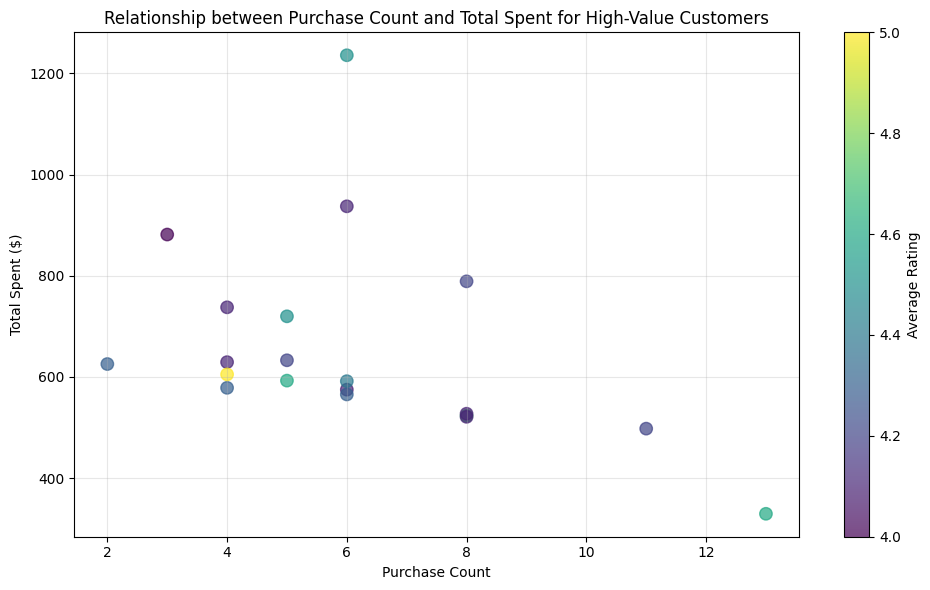

In [28]:
# 分析高價值客戶的區域分布
region_distribution = high_value_customers['Region'].value_counts(normalize=True) * 100
print("高價值客戶的區域分布 (%):")
print(region_distribution)

# 可視化高價值客戶的平均消費和購買次數的關係
plt.figure(figsize=(10, 6))
plt.scatter(high_value_customers['PurchaseCount'], 
            high_value_customers['TotalSpent'],
            c=high_value_customers['AverageRating'], 
            cmap='viridis', 
            alpha=0.7,
            s=80)
plt.colorbar(label='Average Rating')
plt.xlabel('Purchase Count')
plt.ylabel('Total Spent ($)')
plt.title('Relationship between Purchase Count and Total Spent for High-Value Customers')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 📋 7. 總結


### 7.1 進階篩選技巧

- **複雜條件組合**：使用 `&`、`|`、`~` 和括號組合複雜的布爾邏輯
- **query() 方法**：提供更簡潔、易讀的篩選語法，尤其適合複雜條件
- **eval() 函數**：實現向量化運算和條件評估，避免中間DataFrame生成
- **多級索引操作**：使用 `.loc`、`IndexSlice` 和 `.xs()` 高效處理層次化數據
- **正則表達式篩選**：使用 `.str.contains(regex=True)` 和 `.str.extract()` 處理文本數據


### 7.2 性能優化建議

- 對於頻繁查詢的列設置索引，尤其是大型數據集
- 選擇合適的篩選方法：簡單條件用布爾索引，複雜條件用 `query()`
- 優先篩選能排除大量數據的條件
- 考慮使用 `categorical` 類型優化字符串列的內存使用和查詢性能
- 對於極大型數據集，考慮使用分塊處理或 Dask/Vaex 等專用工具


### 7.3 下一步學習

- 探索 Pandas 的分組和聚合功能
- 學習數據透視表和交叉表操作
- 了解 Pandas 中的合併和連接技術
- 掌握時間序列數據分析
- 學習高級數據清洗與預處理方法